In [1]:
from paper import *

In [2]:
# Hyperparameters

M0 = 4
levels = 8
alpha = 2.5
N = M0 * 2 ** levels

num_rep = 1000
initials = np.ones(N)
I_start = 100
delta = 1
low_kappa = 0.522705078125
high_kappa = 0.6

f = 0.3

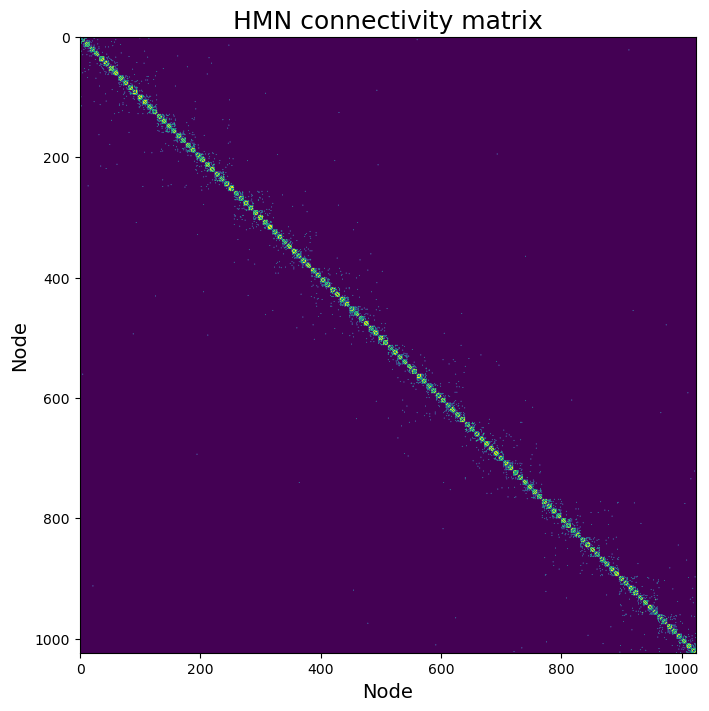

In [3]:
# HMN Network

# links = get_HMN(M0, levels, alpha)
# np.save("data/links", links)
links = np.load("data/links.npy")
plot_HMN(links)

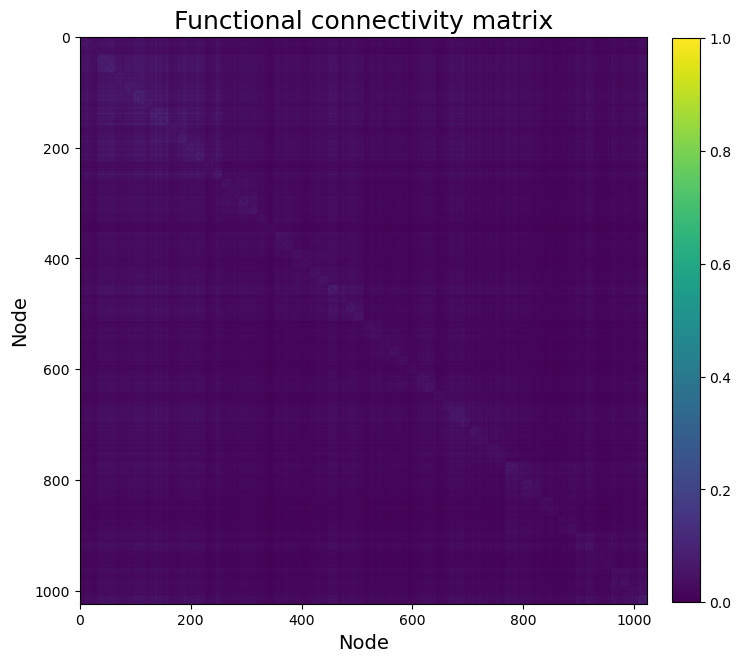

In [4]:
# FC Network for low kappa

# low_C = get_mean_C_MC(links, initials, num_rep, I_start, delta, low_kappa)
low_C = np.loadtxt("results/MC_C_low_kappa/C.txt")
plot_FC(low_C)

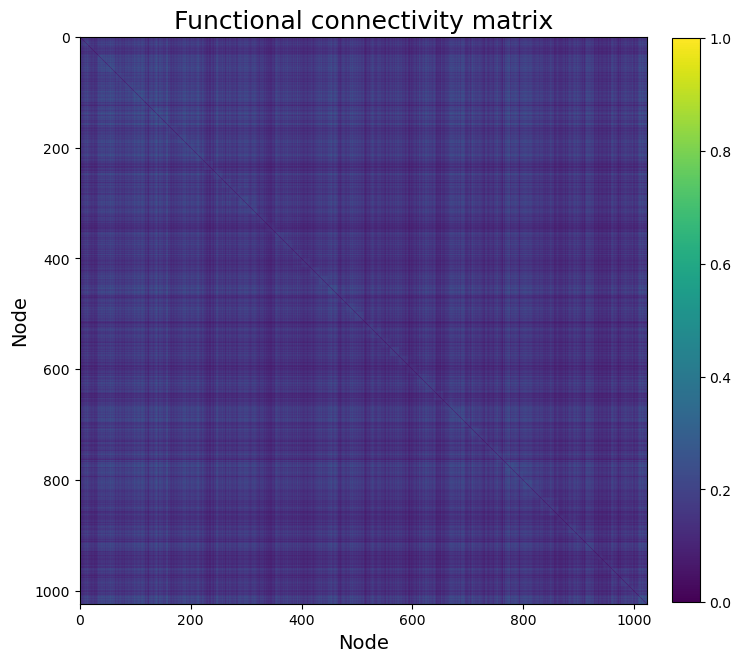

In [5]:
# FC Network for high kappa

# high_C = get_mean_C_MC(links, initials, num_rep, I_start, delta, high_kappa)
high_C = np.loadtxt("results/MC_C_high_kappa/C.txt")
plot_FC(high_C)

In [12]:
low_theta_range = np.linspace(0.0, 0.2, 100)
high_theta_range = np.linspace(0.0, 0.4, 100)
low_s1_vals = []
low_g_vals = []
high_s1_vals = []
high_g_vals = []

for i in tqdm(range(100)):
    low_theta = low_theta_range[i]
    low_A = get_A(low_C, low_theta)
    low_s1, low_g = get_s1_g(low_A)
    low_s1_vals.append(low_s1)
    low_g_vals.append(low_g)

    high_theta = high_theta_range[i]
    high_A = get_A(high_C, high_theta)
    high_s1, high_g = get_s1_g(high_A)
    high_s1_vals.append(high_s1)
    high_g_vals.append(high_g)

100%|██████████| 100/100 [06:18<00:00,  3.79s/it]


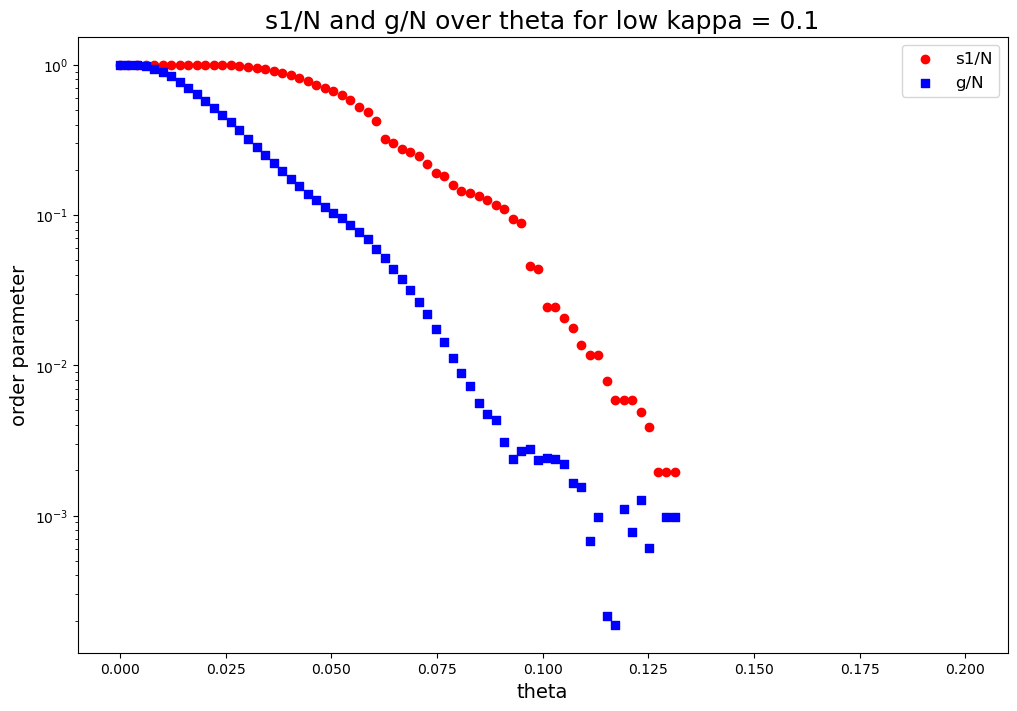

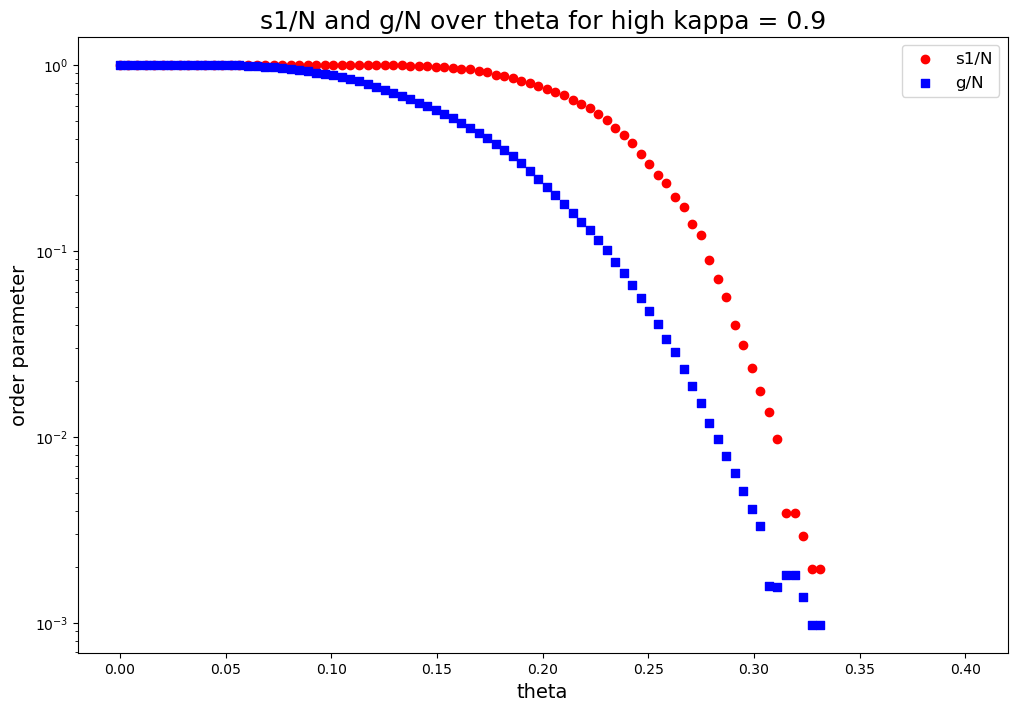

In [14]:
# Plot results

low_s1_theta = low_theta_range[(np.abs(np.array(low_s1_vals) - f)).argmin()]
low_g_theta = low_theta_range[(np.abs(np.array(low_g_vals) - f)).argmin()]
high_s1_theta = high_theta_range[(np.abs(np.array(high_s1_vals) - f)).argmin()]
high_g_theta = high_theta_range[(np.abs(np.array(high_g_vals) - f)).argmin()]

plt.figure(figsize=(12, 8))
plt.scatter(low_theta_range, np.array(low_s1_vals)/N, label="s1/N", marker="o", color="red")
plt.scatter(low_theta_range, np.array(low_g_vals)/N, label="g/N", marker="s", color="blue")
# plt.axvline(low_s1_theta, ymin=0.001, ymax=0.3, linestyle="-", color="red")
# plt.axvline(low_g_theta, ymin=0.001, ymax=0.3, linestyle="-", color="blue")
plt.yscale("log")
# plt.ylim(0.001, 1.0)
plt.title(f"s1/N and g/N over theta for low kappa = {np.round(low_kappa, 4)}", size=18)
plt.xlabel("theta", size=14)
plt.ylabel("order parameter", size=14)
plt.legend(fontsize=12)
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(high_theta_range, np.array(high_s1_vals)/N, label="s1/N", marker="o", color="red")
plt.scatter(high_theta_range, np.array(high_g_vals)/N, label="g/N", marker="s", color="blue")
# plt.axvline(high_s1_theta, ymin=0.001, ymax=0.3, linestyle="-", color="red")
# plt.axvline(high_g_theta, ymin=0.001, ymax=0.3, linestyle="-", color="blue")
plt.yscale("log")
# plt.ylim(0.001, 1.0)
plt.title(f"s1/N and g/N over theta for high kappa = {np.round(high_kappa, 4)}", size=18)
plt.xlabel("theta", size=14)
plt.ylabel("order parameter", size=14)
plt.legend(fontsize=12)
plt.show()